In [7]:
using Printf, CSV, DataFrames, Statistics, Glob, XLSX, Dates, Plots, StatsPlots, TimeSeries, JSON, Distributions

In [2]:
data_directory = joinpath("/projects", "emco4286", "data", "gads", "trajectories", "cc", "long")
files = glob("gen_*_class_CC_rating_*_state_Texas.csv", data_directory)

263-element Vector{String}:
 "/projects/emco4286/data/gads/tr" ⋯ 31 bytes ⋯ "ass_CC_rating_1_state_Texas.csv"
 "/projects/emco4286/data/gads/tr" ⋯ 31 bytes ⋯ "ass_CC_rating_1_state_Texas.csv"
 "/projects/emco4286/data/gads/tr" ⋯ 31 bytes ⋯ "ass_CC_rating_1_state_Texas.csv"
 "/projects/emco4286/data/gads/tr" ⋯ 31 bytes ⋯ "ass_CC_rating_2_state_Texas.csv"
 "/projects/emco4286/data/gads/tr" ⋯ 31 bytes ⋯ "ass_CC_rating_2_state_Texas.csv"
 "/projects/emco4286/data/gads/tr" ⋯ 31 bytes ⋯ "ass_CC_rating_3_state_Texas.csv"
 "/projects/emco4286/data/gads/tr" ⋯ 31 bytes ⋯ "ass_CC_rating_2_state_Texas.csv"
 "/projects/emco4286/data/gads/tr" ⋯ 31 bytes ⋯ "ass_CC_rating_2_state_Texas.csv"
 "/projects/emco4286/data/gads/tr" ⋯ 31 bytes ⋯ "ass_CC_rating_2_state_Texas.csv"
 "/projects/emco4286/data/gads/tr" ⋯ 31 bytes ⋯ "ass_CC_rating_1_state_Texas.csv"
 ⋮
 "/projects/emco4286/data/gads/tr" ⋯ 30 bytes ⋯ "ass_CC_rating_2_state_Texas.csv"
 "/projects/emco4286/data/gads/tr" ⋯ 30 bytes ⋯ "ass_CC_rating_1_st

In [3]:
num_fo_vec = Any[]
foh_vec = Any[]

num_po_vec = Any[]
poh_vec = Any[]

num_mo_vec = Any[]
moh_vec = Any[]

for f in files

    df = DataFrame(CSV.File(f))

    # if size(df)[1] < 1

    #     push!(foh_vec, 0)
    #     push!(num_fo_vec, 0)

    #     push!(poh_vec, 0)
    #     push!(num_po_vec, 0)

    #     push!(moh_vec, 0)
    #     push!(num_mo_vec, 0)

    #     continue
    # end

    gdf = groupby(transform(df, :x => x -> getproperty.(Year.(x), :value)), :x_function)
    
    for (s, e) in zip(gdf.starts[begin:(end -1)], gdf.ends[begin:(end -1)])

        subset = df[s:e, :]

        outage_start = findall(diff(subset[!, :y1]) .== -1)
        outage_end = findall(diff(subset[!, :y1]) .== 1)

        # if plant starts in an outage

        if subset[1, :y1] == 0
            outage_end = outage_end[begin+1: end]
        end

        if length(outage_end) < length(outage_start)
            outage_start = outage_start[begin: end-1]
        elseif length(outage_end) > length(outage_start)
            outage_end = outage_end[begin + 1: end]
        end

        ttr_values = outage_end .- outage_start
        ttf_values_all_types = outage_start[begin + 1: end] - outage_end[begin:end - 1]

        outage_types = df[outage_end, :y2]
        
        fo_idx = findall(outage_types .== 2)

        num_fo = length(fo_idx)
        foh = sum(ttr_values[fo_idx])

        push!(foh_vec, foh)
        push!(num_fo_vec, num_fo)

        po_idx = findall(outage_types .== 3)
        num_po = length(po_idx)
        poh = sum(ttr_values[po_idx])

        push!(poh_vec, poh)
        push!(num_po_vec, num_po)

        mo_idx = findall(outage_types .== 4)
        
        num_mo = length(mo_idx)
        moh = sum(ttr_values[mo_idx])

        push!(moh_vec, moh)
        push!(num_mo_vec, num_mo)
    end

    # outage_start = findall(diff(df[!, :y1]) .== -1)
    # outage_end = findall(diff(df[!, :y1]) .== 1)

    # if length(outage_end) < length(outage_start)
    #     outage_start = outage_start[begin: end-1]
    # elseif length(outage_end) > length(outage_start)
    #     outage_end = outage_end[begin + 1: end]
    # end

    # ttr_values = outage_end .- outage_start
    # ttf_values_all_types = outage_start[begin + 1: end] - outage_end[begin:end - 1]

    # outage_types = df[outage_end, :y2]
    
    # fo_idx = findall(outage_types .== 2)

    # num_fo_average = length(fo_idx)/years
    # foh_average = sum(ttr_values[fo_idx])/years

    # push!(foh_vec, foh_average)
    # push!(num_fo_vec, num_fo_average)

    # po_idx = findall(outage_types .== 3)
    # num_po_average = length(po_idx)/years
    # poh_average = sum(ttr_values[po_idx])/years

    # push!(poh_vec, poh_average)
    # push!(num_po_vec, num_po_average)

    # mo_idx = findall(outage_types .== 4)
    
    # num_mo_average = length(mo_idx)/years
    # moh_average = sum(ttr_values[mo_idx])/years

    # push!(moh_vec, moh_average)
    # push!(num_mo_vec, num_mo_average)

end

In [4]:
num_mo_vec = reduce(vcat, num_mo_vec)
num_fo_vec = reduce(vcat, num_fo_vec)
num_po_vec = reduce(vcat, num_po_vec)

foh_vec = reduce(vcat, foh_vec)
poh_vec = reduce(vcat, poh_vec)
moh_vec = reduce(vcat, moh_vec);

In [5]:
@printf "Average number of FO/ year: %.3f\n" mean(num_fo_vec)
@printf "Average number of PO/ year: %.3f\n" mean(num_po_vec)
@printf "Average number of MO/ year: %.3f\n\n" mean(num_mo_vec)

@printf "Average number of FOH/ year: %.3f hours\n" mean(foh_vec)
@printf "Average number of POH/ year: %.3f hours\n" mean(poh_vec)
@printf "Average number of MOH/ year: %.3f hours\n\n" mean(moh_vec)

@printf "Average number of hours per FO: %.3f hours\n" mean(foh_vec)/mean(num_fo_vec)
@printf "Average number of hours per PO: %.3f hours\n" mean(poh_vec)/mean(num_po_vec)
@printf "Average number of hours per MO: %.3f hours\n" mean(moh_vec)/mean(num_mo_vec)

Average number of FO/ year: 0.983
Average number of PO/ year: 0.885
Average number of MO/ year: 0.402

Average number of FOH/ year: 68.471 hours
Average number of POH/ year: 148.568 hours
Average number of MOH/ year: 31.452 hours

Average number of hours per FO: 69.648 hours
Average number of hours per PO: 167.841 hours
Average number of hours per MO: 78.258 hours


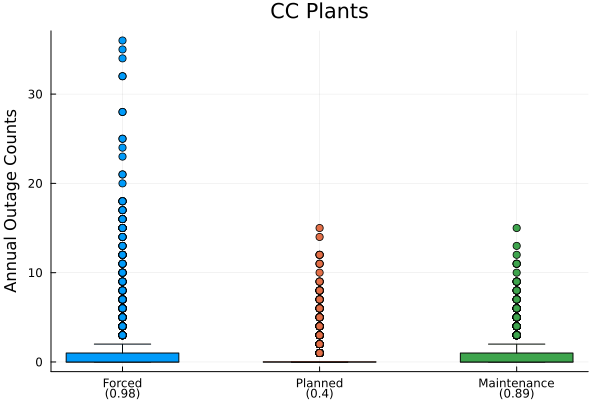

In [13]:
annotations = mean.([num_fo_vec, num_mo_vec, num_po_vec])
boxplot(["Forced" "Planned" "Maintenance"], [num_fo_vec, num_mo_vec, num_po_vec], label="", ylabel="Annual Outage Counts", title="CC Plants")
annotate!([0.5, 1.9, 3.3], -3.5, [text("($(round(j, digits=2)))", 8) for j in annotations])
